In [1]:
import argparse
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import trackpy as tp
from pathlib import Path
import os
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity, adjust_gamma
import cv2

In [2]:
video = "C:\\Users\\swill\\OneDrive - UW-Eau Claire\\WheelerLab\\Data\\project-planaria_sensation\\20240612-a01-SAMS_20240612_114126.24568709\\000000.mp4"
output = "C:\\Users\\swill\\OneDrive - UW-Eau Claire\\WheelerLab\\Data\\project-planaria_sensation\\20240612-a01-SAMS_20240612_114126.24568709\\"
base = Path(output).stem

# read the video; set num_frames to a smaller number for testing
worm_vid = cv2.VideoCapture(video)
# num_frames = int(worm_vid.get(cv2.CAP_PROP_FRAME_COUNT))
num_frames = 100

ret, frame = worm_vid.read()
if ret == True:
    frame_shape = frame.shape

# Reset the video capture to the first frame
worm_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
worm_arr = np.zeros(
    (num_frames, frame_shape[0], frame_shape[1]), np.uint8)

# load video into mem, convert to gray, store in np array
for i in range(num_frames):
    if i % 50 == 0:
        print(f'Loading frame {i} to memory.')
    ret, frame = worm_vid.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    worm_arr[i] = frame

# f = tp.locate(frames[0], 95, invert=True, minmass=50000, maxsize=100000)
# tp.annotate(f, frames[0])

# fig, ax = plt.subplots()
# ax.hist(f['mass'], bins=20)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count')

Loading frame 0 to memory.
Loading frame 50 to memory.


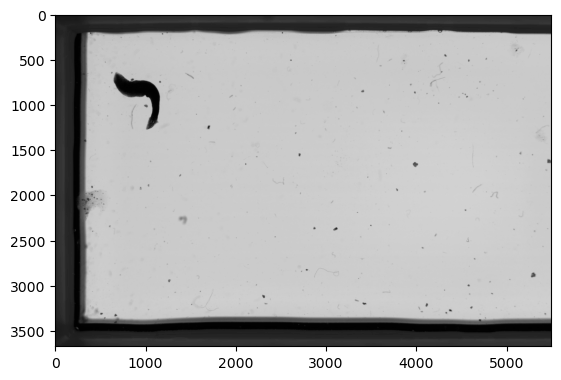

In [3]:
plt.imshow(worm_arr[0], cmap='gray', vmin=0, vmax=255)

In [4]:
# subtract the background and replace the frame in the array
# background subtraction probably not needed with planaria
# i = 0

# print(f'Regenerating background using frames {i} to {i+1000}.')
# background = np.amax(worm_arr, axis=0)
# save_path = Path(output, "background.png")
# cv2.imwrite(str(save_path), background)

# for frame in worm_arr:
#     print(f'Processing frame {i}')
#     arr = np.absolute((frame - background).astype(np.int8))
#     worm_arr[i] = arr
#     if i % 450 == 0:
#         save_path = Path(output, f"{base}_{i}.png")
#         cv2.imwrite(str(save_path), arr)
#     i += 1

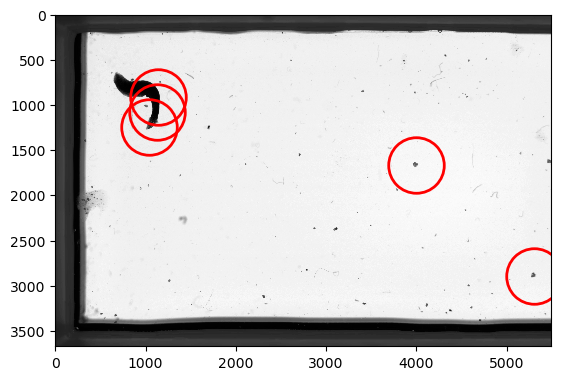

<Axes: >

In [7]:
plt.imshow(worm_arr[0], cmap='gray', vmin=0, vmax=255)

diameter=83

f = tp.locate(worm_arr[0], diameter, minmass=148000, invert=True)
tp.annotate(f, worm_arr[0], plot_style={'markersize':40})

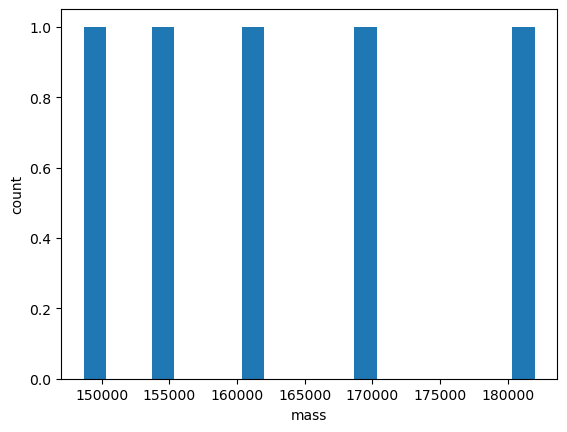

In [8]:
#f.head()

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set(xlabel='mass', ylabel='count');

**Everything below this is old, but dont delete it...**

In [8]:
video = '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-mosquito_sensation/videos/20240301-a01-MRB_20240301_144112.24568709/000000.mp4'
output = '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-mosquito_sensation/videos/20240301-a01-MRB_20240301_144112.24568709/'

base = Path(output).stem
worm_vid = cv2.VideoCapture(video)

num_frames = int(worm_vid.get(cv2.CAP_PROP_FRAME_COUNT))
num_frames = 500

ret, frame = worm_vid.read()

if ret == True:
    frame_shape = frame.shape

# Reset the video capture to the first frame
worm_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)

worm_arr = np.zeros(
    (num_frames, frame_shape[0], frame_shape[1]), np.uint8)

for i in range(num_frames):
    if i % 50 == 0:
        print(f'Loading frame {i} to memory.')
    ret, frame = worm_vid.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    worm_arr[i] = frame
i = 0
for frame in worm_arr:
    if i % 50 == 0:
        print(f'Processing frame {i}')
        print(f'Regenerating background using frames {i} to {i+50}.')
        background = np.amax(worm_arr[i:i+50, :, :], axis=0)
        save_path = Path(output, "background.png")
        cv2.imwrite(str(save_path), background)
    arr = np.absolute((frame - background).astype(np.int8))
    worm_arr[i] = arr
    if i % 450 == 0:
        save_path = Path(output, f"{base}_{i}.png")
        cv2.imwrite(str(save_path), arr)
    i += 1

with tp.PandasHDFStoreBig(Path(output, f"{base}.hd5")) as s:
    tp.batch(worm_arr, 95, minmass=50000,
             output=s)



Frame 499: 1 features


Frame 499: 1 trajectories present.


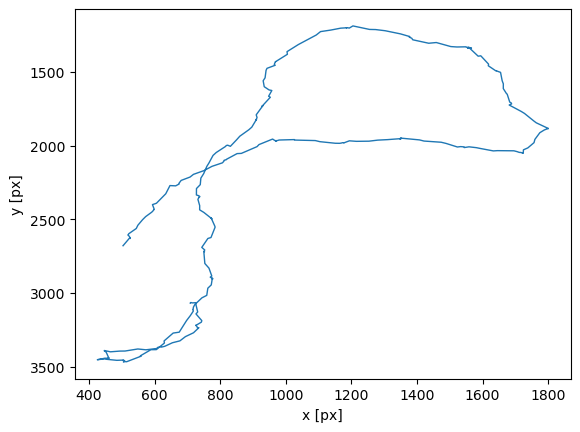

In [9]:
file = Path(output, f"{base}.hd5")
save_path = Path(output, f"{base}.pdf")

with tp.PandasHDFStore(file, mode='r') as hdf5:
    print(f'Getting data from {Path(file).stem}')
    all_results = hdf5.dump()

tracks = tp.link(all_results, 500, memory=100)
fig = plt.figure()
ax = plt.gca()
tp.plot_traj(tracks, ax=ax)
fig.savefig(save_path)

In [2]:
zero_file = '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-miracidia_sensation/invision/20240111/scw_response_double_agar1_20240111_20240111_125604.24568709/000000.hd5'
one_file = '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-miracidia_sensation/invision/20240111/scw_response_double_agar1_20240111_20240111_125604.24568709/000001.hd5'
two_file = '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-miracidia_sensation/invision/20240111/scw_response_double_agar1_20240111_20240111_125604.24568709/000002.hd5'
all_data = []

for file in [zero_file, one_file, two_file]:
    with tp.PandasHDFStore(file) as hdf5:
        all_results = hdf5.dump()
        if file is one_file:
            all_results['frame'] += 18000
        elif file is two_file:
            all_results['frame'] += 36000
        all_data.append(all_results)

all_data = pd.concat(all_data)

In [10]:
worm_arr = np.zeros(
        (18000, 5600, 3500), np.uint8)
for frame in worm_arr:
    print(frame.shape)


(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)
(5600, 3500)

In [3]:
all_results = all_data.drop(columns=['particle'])
all_results.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
3469,2542.184455,1714.531259,1167.943787,11.149499,0.255428,5.426942,2333.0,0.017500,0
3961,2880.589278,3532.464050,1168.766051,11.543374,0.057774,2.795698,2228.0,0.018334,0
4522,3269.324754,1924.638256,1169.259409,10.618119,0.479973,7.564829,2273.0,0.017967,0
2197,1643.847472,149.229494,1170.903937,10.206836,0.293863,4.769131,1513.0,0.027133,0
4028,2923.667181,1434.206645,1173.041823,10.203372,0.461317,7.729282,2263.0,0.018047,0


In [10]:
t = tp.link(all_results, 50, memory=100)

Frame 53991: 50 trajectories present.


In [8]:
t1 = tp.filter_stubs(t, 200)

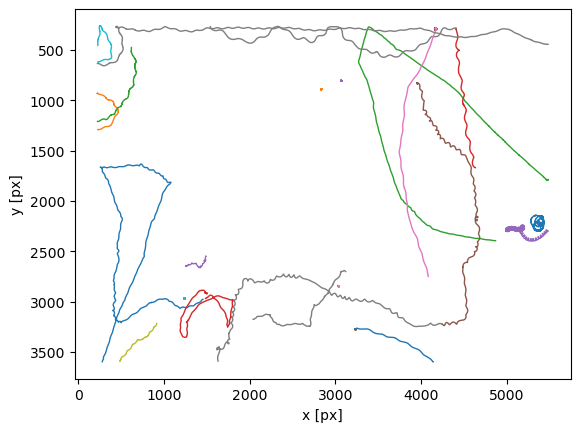

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [9]:
plt.figure()
tp.plot_traj(t1)

In [51]:
obj = pd.read_pickle(r'/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-miracidia_sensation/invision/20240111/scw_response_double_agar1_20240111_20240111_125604.24568709/scw_response_double_agar1_20240111_20240111_125604_tracks.pkl.gz')
plt.figure()
tp.mass_size(obj.groupby('particle').mean())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/njwheeler/Library/CloudStorage/OneDrive-UW-EauClaire/WheelerLab/Data/project-miracidia_sensation/invision/20240111/scw_response_double_agar1_20240111_20240111_125604.24568709/scw_response_double_agar1_20240111_20240111_125604_tracks.pkl.gz'

<Axes: xlabel='x [px]', ylabel='y [px]'>

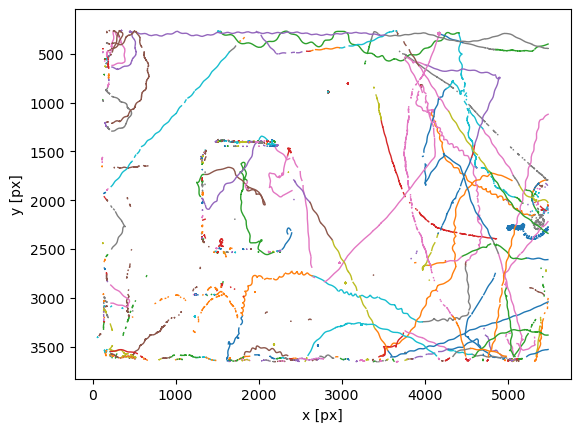

In [15]:
t2 = obj[((obj['mass'] > 1500) & (obj['size'] > 5))]

fig = plt.figure()
ax = plt.gca()
tp.plot_traj(t2, colorby='particle', ax=ax)